In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

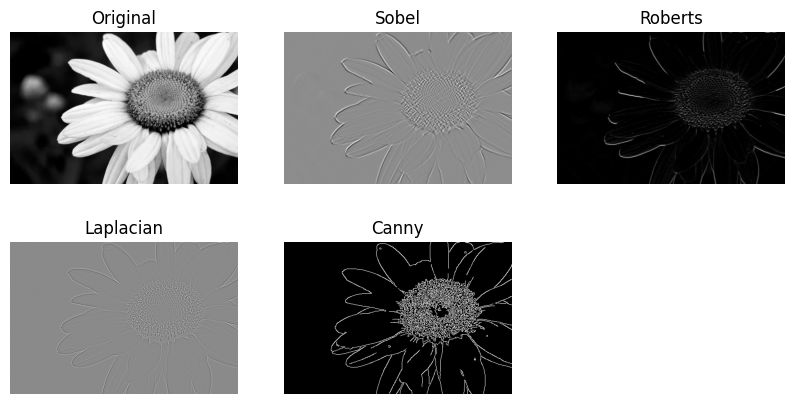

In [5]:
img = cv2.imread('bw.jpg', cv2.IMREAD_GRAYSCALE)

edges_sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
edges_roberts_x = cv2.filter2D(img, -1, np.array([[1, 0], [0, -1]], dtype=np.float32))
edges_roberts_y = cv2.filter2D(img, -1, np.array([[0, 1], [-1, 0]], dtype=np.float32))
edges_roberts = cv2.addWeighted(edges_roberts_x, 0.5, edges_roberts_y, 0.5, 0)
edges_laplacian = cv2.Laplacian(img, cv2.CV_64F)
edges_canny = cv2.Canny(img, 100, 200)

titles = ['Original', 'Sobel', 'Roberts', 'Laplacian', 'Canny']
images = [img, edges_sobel, edges_roberts, edges_laplacian, edges_canny]

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


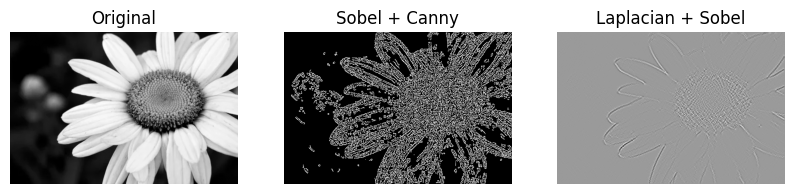

In [6]:
sobel_combined = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
hybrid_sobel_canny = cv2.Canny(np.uint8(np.abs(sobel_combined)), 100, 200)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
hybrid_laplacian_sobel = cv2.Sobel(np.uint8(np.abs(laplacian)), cv2.CV_64F, 1, 1, ksize=5)

titles = ['Original', 'Sobel + Canny', 'Laplacian + Sobel']
images = [img, hybrid_sobel_canny, hybrid_laplacian_sobel]

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


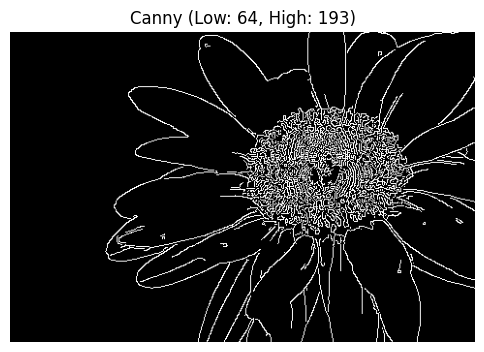

In [8]:
img = cv2.imread('bw.jpg', cv2.IMREAD_GRAYSCALE)

mean_brightness = np.mean(img)

low_threshold = max(50, int(mean_brightness * 0.5))
high_threshold = min(200, int(mean_brightness * 1.5))

edges_adaptive = cv2.Canny(img, low_threshold, high_threshold)

plt.figure(figsize=(6, 6))
plt.imshow(edges_adaptive, cmap='gray')
plt.title(f'Canny (Low: {low_threshold}, High: {high_threshold})')
plt.axis('off')
plt.show()

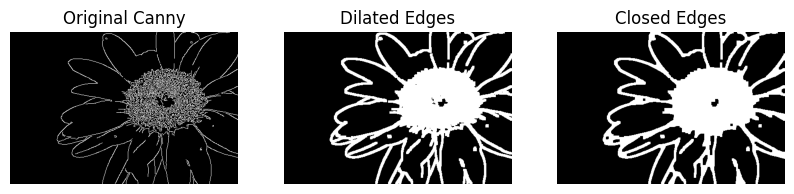

In [10]:
edges = cv2.Canny(img, 100, 200)

kernel = np.ones((5, 5), np.uint8)
edges_dilated = cv2.dilate(edges, kernel, iterations=1)  
edges_closed = cv2.morphologyEx(edges_dilated, cv2.MORPH_CLOSE, kernel)  

titles = ['Original Canny', 'Dilated Edges', 'Closed Edges']
images = [edges, edges_dilated, edges_closed]

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()
